In [1]:
# Goal: Given some temperature calculate color as function of temperature

In [2]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.blackbody as blackbody
import snelib19odp.synphot as synphot

In [20]:
u_flt = synphot.load_filter('Swift_UVOT', 'U')
g_flt = synphot.load_filter('Palomar_ZTF', 'g')
r_flt = synphot.load_filter('Palomar_ZTF', 'r')
i_flt = synphot.load_filter('Palomar_ZTF', 'i')


waves = np.linspace(1000, 9000)

In [9]:
def calculate_mag(flt, temp):
    sed = blackbody.bb(temp, 1, waves)
    return flt.get_ab_magnitude(sed, waves)

In [21]:
temp = np.linspace(3000, 30e3)
u = np.array([calculate_mag(u_flt, t) for t in temp])
g = np.array([calculate_mag(g_flt, t) for t in temp])
r = np.array([calculate_mag(r_flt, t) for t in temp])
i = np.array([calculate_mag(i_flt, t) for t in temp])


In [15]:
u-r

array([ 3.64487339,  2.84223768,  2.25004701,  1.79745555,  1.44179764,
        1.15602016,  0.92217751,  0.72790444,  0.56440701,  0.42526411,
        0.30568218,  0.20201477,  0.11144271,  0.03175545, -0.03880203,
       -0.10163871, -0.15789704, -0.20851189, -0.25425458, -0.29576636,
       -0.33358415, -0.36816042, -0.39987879, -0.4290664 , -0.45600368,
       -0.48093222, -0.50406114, -0.52557225, -0.54562428, -0.56435634,
       -0.58189084, -0.59833583, -0.61378704, -0.62832956, -0.64203921,
       -0.65498379, -0.66722409, -0.67881472, -0.68980493, -0.70023917,
       -0.71015771, -0.71959708, -0.72859049, -0.73716821, -0.74535787,
       -0.75318475, -0.76067201, -0.76784089, -0.77471096, -0.7813002 ])

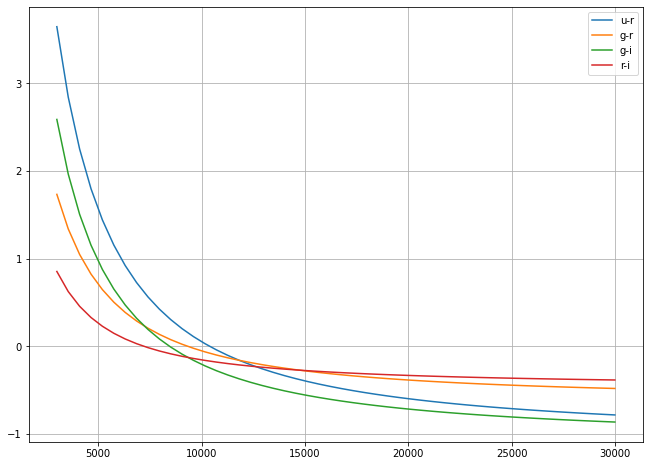

In [25]:
plt.figure(figsize=(11,8))
plt.plot(temp, u-r, label='u-r')
#plt.plot(temp, u-g, label='u-g')
plt.plot(temp, g-r, label='g-r')
plt.plot(temp, g-i, label='g-i')
plt.plot(temp, r-i, label='r-i')
plt.legend()
plt.grid()